# WFE and PSF Metrics for VisMCAO
2000 actuators, 6 LGS (7mag), 1 TT (8mag)

In [1]:
from paarti.utils import maos_utils
import matplotlib.pyplot as plt
from bpeck.mcao import act_study

In [2]:
#act_study.print_mag_to_flux(2000, 6000, 1000, 7, 8)

In [3]:
total = maos_utils.print_wfe_metrics(seed=1)

---------------------
WaveFront Error (nm): [note, piston removed from all]
---------------------
Field Avg        Total   High_Order           TT
---------  -----------   ----------   ----------
Open             885.0        837.5        286.3
Closed           372.2        353.9        115.2

Pos  0 
-------  
Open             946.2        859.7        395.2
Closed           203.7        155.8        131.1

Pos  1 
-------  
Open             932.3        856.2        368.9
Closed           207.5        164.9        125.9

Pos  2 
-------  
Open             914.2        848.1        341.3
Closed           206.7        170.1        117.4

Pos  3 
-------  
Open             896.4        840.2        312.4
Closed           194.7        162.4        107.3

Pos  4 
-------  
Open             880.2        833.6        282.6
Closed           194.5        169.1         96.1

Pos  5 
-------  
Open             866.6        828.9        252.9
Closed           220.1        202.3         86.7

Pos

## WFE: Total, Tip-Tilt and High-Order

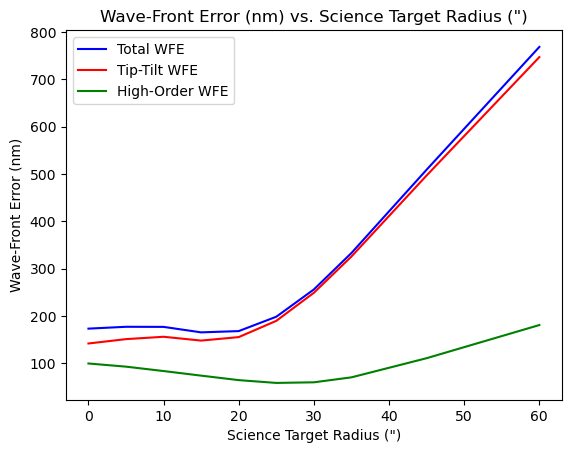

In [13]:
total_wfe = [173.0, 176.9, 176.7, 165.1, 167.8, 198.2, 255.9, 333.0, 509.1, 768.7]
tt_wfe = [141.6, 150.8, 155.8, 147.7, 155.1, 189.5, 248.9, 325.6, 496.9, 747.2]
truth_wfe = [99.3, 92.6, 83.3, 73.6, 64.1, 58.2, 59.5, 70.0, 110.5, 180.6]

psf = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]
plt.plot(psf, total_wfe, color='blue', label="Total WFE")
plt.plot(psf, tt_wfe, color='red', label="Tip-Tilt WFE")
plt.plot(psf, truth_wfe, color='green', label="High-Order WFE" )
plt.title('Wave-Front Error (nm) vs. Science Target Radius (")')
plt.xlabel('Science Target Radius (")')
plt.ylabel("Wave-Front Error (nm)")
plt.legend()
plt.show()

## Setup

In [11]:
import pylab as plt
import numpy as np
from paarti.utils import maos_utils
from paarti import psfs, psf_plots

psf_x = [0, 5, 10, 15, 20, 25, 30, 35, 45, 60]  # arcsec
psf_y = [0, 0,  0,  0,  0,  0,  0,  0,  0,  0]  # arcsec
psf_wvl = [432, 544, 652, 810, 877, 1020, 1248, 1673, 2200]

seed = 1

%matplotlib inline

In [12]:
mets = maos_utils.get_psf_metrics_over_field(seed=seed)
x, y, w, strehl, fwhm_g, fwhm_e, r_ee50, r_ee80 = mets

Looking in ./ for simulation results...
xx =  0 yy =  0
xx =  10 yy =  0
xx =  15 yy =  0
xx =  20 yy =  0
xx =  25 yy =  0
xx =  30 yy =  0
xx =  35 yy =  0
xx =  45 yy =  0
xx =  5 yy =  0
xx =  60 yy =  0


In [6]:
x.shape

(10, 9)

## Strehl

Text(0.5, 1.0, 'Science Target Radius (") vs. Strehl')

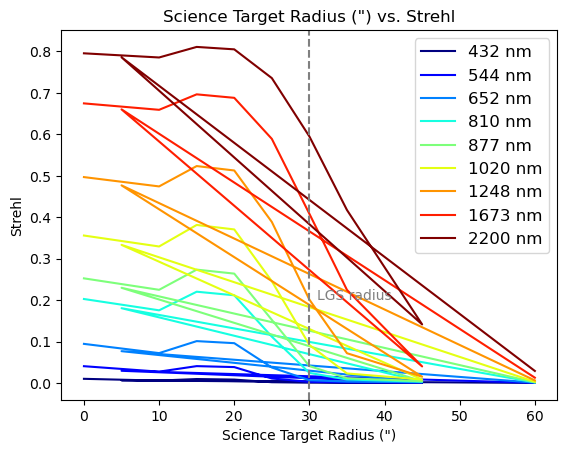

In [7]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], strehl[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Strehl')
plt.axvline(30, linestyle='--', color='grey')
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Strehl')

## Empirical FWHM

Text(0.5, 1.0, 'Science Target Radius (") vs. Emp. FWHM (mas)')

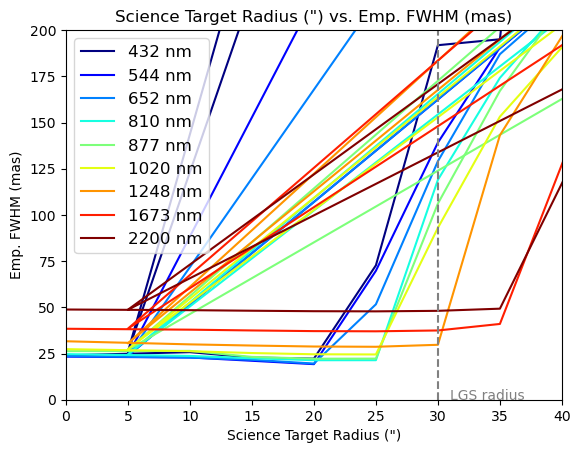

In [8]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

plt.figure(1)

for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    plt.plot(x[:, ww], fwhm_e[:, ww], color=colors[ww], label=label)    

plt.legend(fontsize=12)
plt.xlabel('Science Target Radius (")')
plt.ylabel('Emp. FWHM (mas)')
plt.axvline(30, linestyle='--', color='grey')
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.text(31, 0.2, 'LGS radius', color='grey')
plt.title('Science Target Radius (") vs. Emp. FWHM (mas)')

## Encircled Energy (50 and 80)

Text(0.5, 1.0, 'Science Target Radius (") vs. EE80 Radius (mas)')

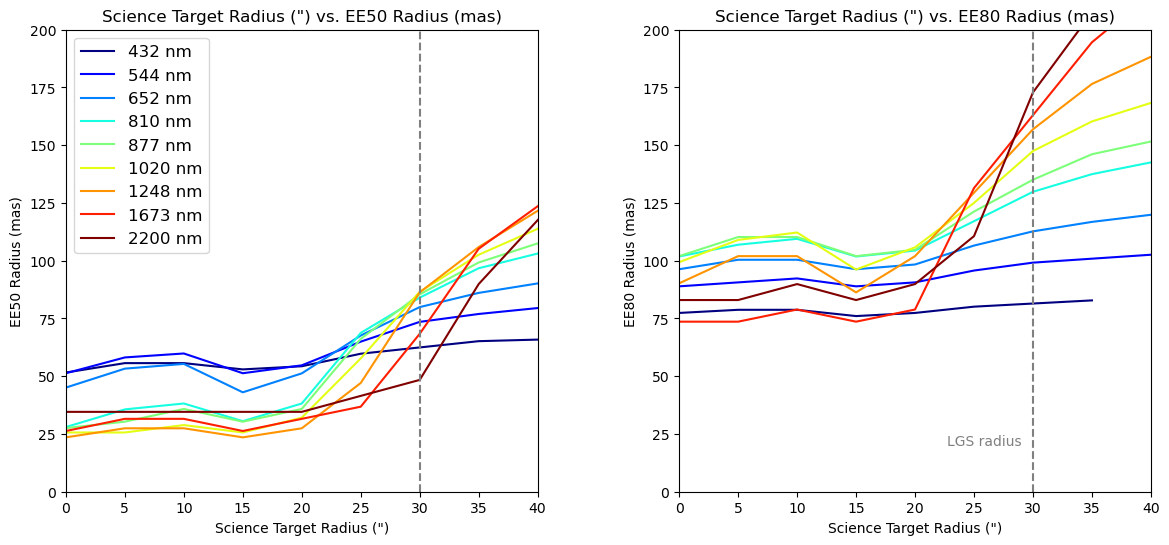

In [19]:
n_wvl = x.shape[1]
colors = plt.cm.jet(np.linspace(0,1,n_wvl))

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.3)
    
for ww in range(n_wvl):
    label = f'{w[0, ww]*1e3:3.0f} nm'
    axs[0].plot(x[:, ww], r_ee50[:, ww], color=colors[ww], label=label)    
    axs[1].plot(x[:, ww], r_ee80[:, ww], color=colors[ww])    

axs[0].legend(fontsize=12)
axs[0].set_xlabel('Science Target Radius (")')
axs[1].set_xlabel('Science Target Radius (")')
axs[0].set_ylabel('EE50 Radius (mas)')
axs[1].set_ylabel('EE80 Radius (mas)')
axs[0].axvline(30, linestyle='--', color='grey')
axs[1].axvline(30, linestyle='--', color='grey')
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0, 200)
axs[1].set_xlim(0, 40)
axs[1].set_ylim(0, 200)
axs[1].text(29, 20, 'LGS radius', color='grey', ha='right')
axs[0].set_title('Science Target Radius (") vs. EE50 Radius (mas)')
axs[1].set_title('Science Target Radius (") vs. EE80 Radius (mas)')